<a href="https://colab.research.google.com/github/Hjhirp/Robotic-Arm-Navigation/blob/main/Notebook/Robotic_Arm_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pybullet Implementation

In [ ]:
!pip install pybullet

In [ ]:
from IPython.display import Image
!pip3 install numpngw
from numpngw import write_apng

In [ ]:
import pybullet
import time
import pybullet_data
import os
import imageio
import numpy as np
!pip3 install pybullet --upgrade
!pip3 install stable_baselines --upgrade
!pip3 install tensorflow==1.14.0 #tensorflow deprecates and breaks their API
import pybullet_envs as pe

In [ ]:
from stable_baselines import PPO2
print("start learning, wait a minute")
%time model = PPO2("MlpPolicy", "CartPoleContinuousBulletEnv-v0").learn(40000)
#model = PPO2("MlpPolicy", "CartPoleContinuousBulletEnv-v0").learn(20000)

print("done learning")
images = []
obs = model.env.reset()
img = model.env.render(mode='rgb_array')
for i in range(200):
    action, _ = model.predict(obs)
    obs, _, _ ,_ = model.env.step(action)
    img = model.env.render(mode='rgb_array')
    images.append(img)


model.env.close()


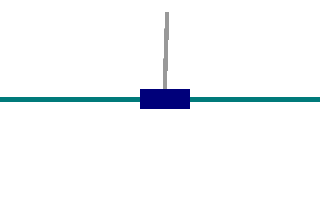

In [ ]:
write_apng('anim.png', images, delay=20)
Image(filename='anim.png')

## Pybullet Robotic Arm

In [ ]:
%%time
!pip install pybullet

     |████████████████████████████████| 90.8 MB 266 bytes/s 
CPU times: user 198 ms, sys: 33.1 ms, total: 232 ms
Wall time: 12.5 s


In [ ]:
#you can enable the GPU by changing the runtime
import os
os.environ['MESA_GL_VERSION_OVERRIDE'] = '3.3'
os.environ['MESA_GLSL_VERSION_OVERRIDE'] = '330'
import pybullet as p
import pybullet_data as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline
p.connect(p.DIRECT)
#allow to find the assets (URDF, obj, textures etc)
p.setAdditionalSearchPath(pd.getDataPath())
#optionally enable GPU for faster rendering in pybullet.getCameraImage
enableGPU = False
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
import GPUtil as GPU
import sys
# Get all device ids and their processing and memory utiliazion
# (deviceIds, gpuUtil, memUtil) = GPU.getGPUs()

# Print os and python version information
print('OS: ' + sys.platform)
print(sys.version)

# Print package name and version number
print(GPU.__name__ + ' ' + GPU.__version__)

# Show the utilization of all GPUs in a nice table
GPU.showUtilization()

# Show all stats of all GPUs in a nice table
GPU.showUtilization(all=True)

# NOTE: If all your GPUs currently have a memory consumption larger than 1%,
# this step will fail. It's not a bug! It is intended to do so, if it does not
# find an available GPU.
GPUs = GPU.getGPUs()
numGPUs = len(GPU.getGPUs())
print("numGPUs=",numGPUs)
if numGPUs > 0:
  enableGPU = True
eglPluginId = -1
if enableGPU:
  import pkgutil
  egl = pkgutil.get_loader('eglRenderer')
  if (egl):
    eglPluginId = p.loadPlugin(egl.get_filename(), "_eglRendererPlugin")
  else:
    eglPluginId = p.loadPlugin("eglRendererPlugin")

if eglPluginId>=0:
  print("Using GPU hardware (eglRenderer)")
else:
  print("using CPU renderer (TinyRenderer)")

  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=c2724e48c6c0265a63c67655a0b2864af00535590700c778dcbc45151efeee63
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built gputil
OS: linux
3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
GPUtil 1.4.0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |
| ID | Name     | Serial        | UUID                                     || GPU temp. | GPU util. | Memory util. || Memory total | Memory used | Memory free || Display mode | Display active |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  0 | Tesla T4 | 1561820022663 | GPU-3734368d-8319-7999-26df-be3c30889be0 ||       37C |        0% |           0% ||      15109MB |         0MB |     15109MB || Enabled      | Disabled       |
num

### Pybullet code

In [ ]:
p.resetSimulation()
p.configureDebugVisualizer(p.COV_ENABLE_GUI)
useFixedBase = True
flags = p.URDF_INITIALIZE_SAT_FEATURES

plane_pos = [0,0,-0.625]
plane = p.loadURDF("plane.urdf", plane_pos, flags = flags, useFixedBase=useFixedBase)
table_pos = [0,0,-0.625]
table = p.loadURDF("table/table.urdf", table_pos, flags = flags, useFixedBase=useFixedBase)
xarm = p.loadURDF("xarm/xarm6_robot.urdf", flags = flags, useFixedBase=useFixedBase)
# xarm = p.loadURDF("laikago/laikago_toes.urdf", [1,0,-0.15],[0, 0.5, 0.5, 0], flags = flags, useFixedBase=useFixedBase)

In [ ]:
position, orientation = p.getBasePositionAndOrientation(xarm)
orientation

(0.0, 0.0, 0.0, 1.0)

In [ ]:
p.getNumJoints(xarm)

7

In [ ]:
joint_index = 3
joint_info = p.getJointInfo(xarm, joint_index)
name, joint_type, lower_limit, upper_limit = \
    joint_info[1], joint_info[2], joint_info[8], joint_info[9]
name, joint_type, lower_limit, upper_limit

(b'joint3', 0, -3.927, 0.19198)

In [ ]:
joint_positions = [j[0] for j in p.getJointStates(xarm, range(6))]
joint_positions

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
p.setJointMotorControlArray(
    xarm, range(6), p.POSITION_CONTROL,
    targetPositions=[0.1] * 6)
for _ in range(10000):
    p.stepSimulation()

,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


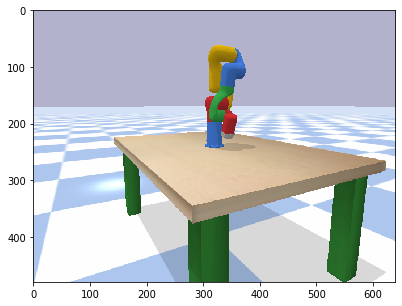

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


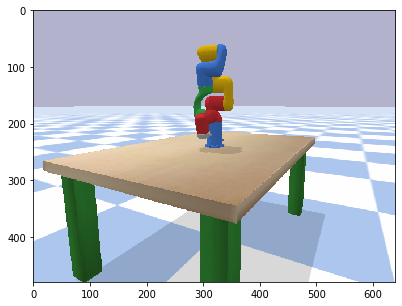

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


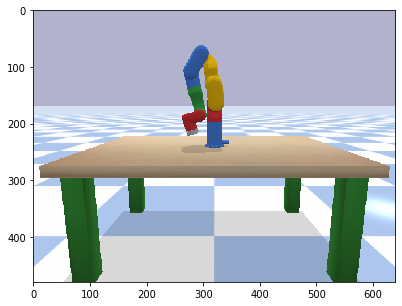

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


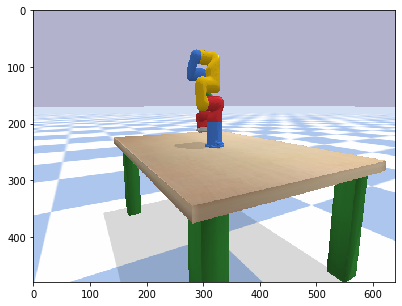

<IPython.core.display.Javascript object>

CPU times: user 883 ms, sys: 64.1 ms, total: 947 ms
Wall time: 998 ms


In [ ]:
%%time
camTargetPos = [0, 0, 0]
cameraUp = [0, 0, 1]
cameraPos = [1, 1, 1]
p.setGravity(0, 0, -10)

from google.colab import widgets
import numpy as np
import random
import time
from matplotlib import pylab
grid = widgets.Grid(2, 2)
yaw = 0
for r in range(2):
  for c in range(2):
    yaw += 60
    with grid.output_to(r, c):
      grid.clear_cell()
      pylab.figure(figsize=(10, 5))
      pitch = -10.0
      roll = 0
      upAxisIndex = 2
      camDistance = 1.5
      pixelWidth = 640
      pixelHeight = 480
      nearPlane = 0.01
      farPlane = 100
      fov = 60
      viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
                                                                  roll, upAxisIndex)
      aspect = pixelWidth / pixelHeight
      projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)

      img_arr = p.getCameraImage(pixelWidth,pixelHeight,viewMatrix,projectionMatrix)
      w = img_arr[0]  #width of the image, in pixels
      h = img_arr[1]  #height of the image, in pixels
      rgb = img_arr[2]  #color data RGB
      dep = img_arr[3]  #depth data
      print("w=",w,"h=",h)
      np_img_arr = np.reshape(rgb, (h, w, 4))
      np_img_arr = np_img_arr * (1. / 255.)
      pylab.imshow(np_img_arr, interpolation='none', animated=True, label="pybullet")

creating animated png, please about 5 seconds
CPU times: user 4.23 s, sys: 11.3 ms, total: 4.24 s
Wall time: 4.24 s
CPU times: user 634 µs, sys: 1.15 ms, total: 1.78 ms
Wall time: 1.12 ms


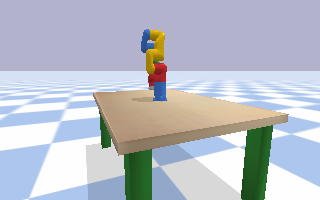

In [ ]:
!pip install numpngw
from numpngw import write_apng
from IPython.display import Image


frames=[] #frames to create animated png
for r in range(60):
    yaw += 6
    pitch = -10.0
    roll = 0
    upAxisIndex = 2
    camDistance = 1.5
    pixelWidth = 320
    pixelHeight = 200
    nearPlane = 0.01
    farPlane = 100
    fov = 60
    viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
                                                                roll, upAxisIndex)
    aspect = pixelWidth / pixelHeight
    projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)

    img_arr = p.getCameraImage(pixelWidth,pixelHeight,viewMatrix,projectionMatrix)
    w = img_arr[0]  #width of the image, in pixels
    h = img_arr[1]  #height of the image, in pixels
    rgb = img_arr[2]  #color data RGB
    dep = img_arr[3]  #depth data
    #print("w=",w,"h=",h)
    np_img_arr = np.reshape(rgb, (h, w, 4))
    frame = np_img_arr[:, :, :3]
    frames.append(frame)
print("creating animated png, please about 5 seconds")
%time write_apng("example6.png", frames, delay=100)
%time Image(filename="example6.png")



# Our Code




In [ ]:
!pip install gym

In [ ]:
#QL1

import gym
import numpy as np

# Creating an Environment
env = gym.make("MountainCar-v0")
# Reset Environment before Starting
env.reset()

# High Value from all of the Observations
print(env.observation_space.high)
# Low Value from all of the Observations
print(env.observation_space.low)
# Total Possible Actions
print(env.action_space.n)

# Only for this Example
# In orignal it will not a hardcoded because it will change by environment
DISCRETE_OS_SIZE = [20] * len(env.observation_space.high)
discrete_os_win_size = ( env.observation_space.high - env.observation_space.low ) / DISCRETE_OS_SIZE

print(discrete_os_win_size)

# Here we assign q_table with negative rewards because after each steps it will give negative reward
# size = 20x20x3
q_table = np.random.uniform( low = -2, high = 0, size = ( DISCRETE_OS_SIZE + [env.action_space.n] ) )
print(q_table.shape)
print(q_table)

done = False

# Rndomly initialize Q-Values at Initial Step
# ----------
# ACTION SPACE
# 0 - LEFT
# 1 - Stay
# 2 - Right
# -1 - so Far
# ----------
# In this, New State has 2 values Position, Velocity so it will return 2 values in new_state, reward based on the action and task was done or not
# Model does not matter all that much what values actually are as long as they were meaningful obviously
while not done :
    action = 2
    new_state, reward, done, _ = env.step(action)
    print(reward, new_state)
    img = env.render(mode='rgb_array')
    for i in range(200):
      action, _ = predict(obs)
      obs, _, _ ,_ = env.step(action)
      img = env.render(mode='rgb_array')
      images.append(img)

env.close()

[0.6  0.07]
[-1.2  -0.07]
3
[0.09  0.007]
(20, 20, 3)
[[[-0.39465419 -1.60762663 -0.1533747 ]
  [-0.02468634 -1.86928278 -1.50522611]
  [-0.05549326 -1.41200816 -1.25311745]
  ...
  [-0.7186077  -1.89439478 -0.80953276]
  [-1.07770736 -1.83167575 -1.25561671]
  [-0.91266941 -0.29214725 -0.53849245]]

 [[-1.57073929 -0.1391711  -0.52485324]
  [-1.41720254 -0.18804387 -0.43179161]
  [-1.86529189 -1.32612762 -0.26074634]
  ...
  [-0.947532   -0.48629914 -0.1417687 ]
  [-0.5624952  -1.18286836 -0.7688502 ]
  [-0.71973914 -0.58414528 -1.71994183]]

 [[-0.64874382 -1.02156644 -0.56841938]
  [-1.91606764 -0.11043759 -0.511804  ]
  [-1.39481974 -0.96067536 -0.46793349]
  ...
  [-1.66805754 -0.82431629 -1.63308866]
  [-1.16248556 -1.99334537 -0.80137903]
  [-0.12359247 -1.91774967 -1.29000325]]

 ...

 [[-1.22828866 -1.40104983 -1.9556742 ]
  [-0.23655941 -0.27872765 -1.11984491]
  [-0.6280763  -0.94261759 -0.67326276]
  ...
  [-1.50719673 -0.11933552 -0.76448786]
  [-1.65261702 -0.87398735 -1.

NoSuchDisplayException: ignored

0


FileNotFoundError: ignored

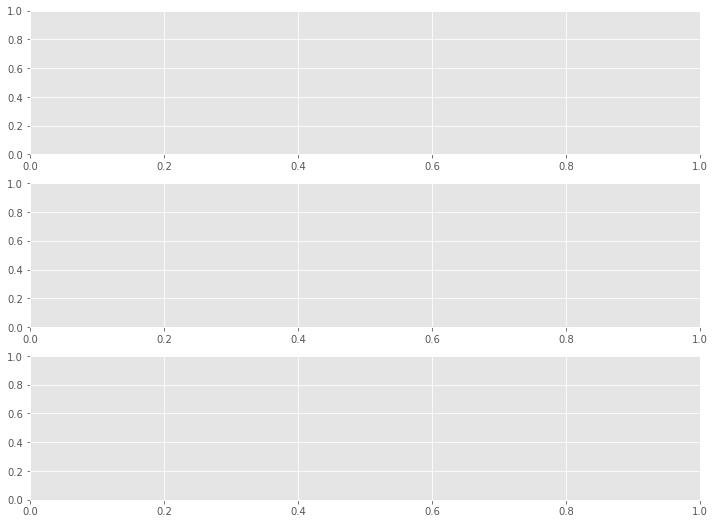

In [ ]:
# #plotterscatter.py

# from mpl_toolkits.mplot3d import axes3d
# import matplotlib.pyplot as plt
# from matplotlib import style
# import numpy as np

# style.use('ggplot')


# def get_q_color(value, vals):
#     if value == max(vals):
#         return "green", 1.0
#     else:
#         return "red", 0.3
# #

# fig = plt.figure(figsize=(12, 9))


# for i in range(0, 25000, 10):
#     print(i)
#     ax1 = fig.add_subplot(311)
#     ax2 = fig.add_subplot(312)
#     ax3 = fig.add_subplot(313)

#     q_table = np.load(f"qtables/{i}-qtable.npy")

#     for x, x_vals in enumerate(q_table):
#         for y, y_vals in enumerate(x_vals):
#             ax1.scatter(x, y, c=get_q_color(y_vals[0], y_vals)[0], marker="o", alpha=get_q_color(y_vals[0], y_vals)[1])
#             ax2.scatter(x, y, c=get_q_color(y_vals[1], y_vals)[0], marker="o", alpha=get_q_color(y_vals[1], y_vals)[1])
#             ax3.scatter(x, y, c=get_q_color(y_vals[2], y_vals)[0], marker="o", alpha=get_q_color(y_vals[2], y_vals)[1])

#             ax1.set_ylabel("Action 0")
#             ax2.set_ylabel("Action 1")
#             ax3.set_ylabel("Action 2")

#     #plt.show()
#     plt.savefig(f"qtable_charts/{i}.png")
#     plt.clf()

In [ ]:
#QL2


import gym
import numpy as np

# Creating an Environment
env = gym.make("MountainCar-v0")

# High Value from all of the Observations
# print(env.observation_space.high)
# Low Value from all of the Observations
# print(env.observation_space.low)
# Total Possible Actions
# print(env.action_space.n)


LEARNING_RATE = 0.1
# Measure of How Important futute action/reward over current action/reward
DISCOUNT = 0.95
EPISODES = 25000

SHOW_EVERY = 200


# Only for this Example
# In orignal it will not a hardcoded because it will change by environment
DISCRETE_OS_SIZE = [20] * len(env.observation_space.high)
discrete_os_win_size = ( env.observation_space.high - env.observation_space.low ) / DISCRETE_OS_SIZE

# Range 0-1
# More epsilon then more likely perform random action
# Change is litter quicker
epsilon = 0.5
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES // 2
epsilon_decay_value = epsilon / ( END_EPSILON_DECAYING - START_EPSILON_DECAYING )

# print(discrete_os_win_size)

# Here we assign q_table with negative rewards because after each steps it will give negative reward
# size = 20x20x3
q_table = np.random.uniform( low = -2, high = 0, size = ( DISCRETE_OS_SIZE + [env.action_space.n] ) )
# print(q_table.shape)
# print(q_table)


def get_discrete_state(continuous_state) :
    discrete_state = ( continuous_state - env.observation_space.low ) / discrete_os_win_size
    return tuple(discrete_state.astype(np.int64))


# Rndomly initialize Q-Values at Initial Step
# ----------
# ACTION SPACE
# 0 - LEFT
# 1 - Stay
# 2 - Right
# -1 - so Far
# ----------
# In this, New State has 2 values Position, Velocity so it will return 2 values in new_state, reward based on the action and task was done or not
# Model does not matter all that much what values actually are as long as they were meaningful obviously
for episode in range(EPISODES) :
    # Reset Environment before Starting
    discrete_state = get_discrete_state(env.reset())
    # print(discrete_state)
    # print(np.argmax(q_table[discrete_state]))
    done = False

    if episode % SHOW_EVERY == 0:
        render = True
        print(episode)
    else :
        render = False

    while not done :
        if np.random.random() > epsilon :
            action = np.argmax(q_table[discrete_state])
        else :
            action = np.random.randint(0, env.action_space.n)
        new_state, reward, done, _ = env.step(action)
        new_discrete_state = get_discrete_state(new_state)
        # if render :
            # env.render()
        if not done :
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action, )]
            new_q = ( ( 1 - LEARNING_RATE ) * current_q ) + ( LEARNING_RATE * ( reward + DISCOUNT * max_future_q ) )
            q_table[discrete_state + (action, )] = new_q
        elif new_state[0] >= env.goal_position :
            print("We made it on Episode :", episode)
            q_table[discrete_state + (action, )] = 0
        discrete_state = new_discrete_state

    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING :
        episode -= epsilon_decay_value

env.close()